In [1]:
%load_ext lab_black
%load_ext autotime
import numpy as np
import pandas as pd

time: 247 ms (started: 2022-09-15 23:06:19 -07:00)


The [ORL database of faces](https://cam-orl.co.uk/facedatabase.html). 10 images (64 x 64 pixels) each of 40 different subjects. That page says the resolution is 92 x 112, but the resolution via `sklearn` is 64 x 64. The website of [Sam Roweis](https://cs.nyu.edu/~roweis/data.html) offers this dataset at the 64 x 64 resolution, so perhaps it comes from there? See the `oliverri92x122.ipynb` notebook for the higher res image version (although that's obviously a relative term).

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

time: 398 ms (started: 2022-09-15 23:06:19 -07:00)


In [3]:
olivetti.data.shape

(400, 4096)

time: 8.35 ms (started: 2022-09-15 23:06:20 -07:00)


The `target` for this data is the image id (the poses are arbitrary for each subject so are not useful for our purposes):

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

time: 4.78 ms (started: 2022-09-15 23:06:20 -07:00)


## View face image

A function to visualize a face, based on an [sklearn example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html).

In [5]:
import math

import matplotlib.pyplot as plt


def show_olivetti(olivetti, subject, pose):
    if not 0 <= subject < 40:
        raise ValueError(f"subject should be a value in [0, 39]")
    n_poses = 10
    if not 0 <= pose < n_poses:
        raise ValueError(f"image should be a value in [0, 9]")
    idx = subject * n_poses + subject
    npix = olivetti.data.shape[1]
    nx = int(math.sqrt(npix))
    ny = nx
    plt.imshow(
        olivetti.data[idx].reshape((nx, ny)),
        cmap=plt.cm.gray,
        interpolation="nearest",
        vmin=0,
        vmax=1,
    )

time: 512 ms (started: 2022-09-15 23:06:20 -07:00)


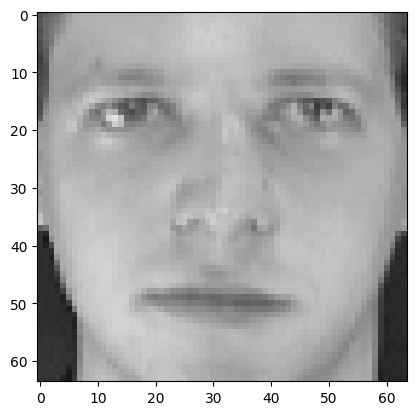

time: 148 ms (started: 2022-09-15 23:06:20 -07:00)


In [6]:
show_olivetti(olivetti, 0, 0)

## Pipeline

In [7]:
from drnb.util import categorize

target = pd.DataFrame(dict(pose_id=list(range(10)) * 40, subject_id=olivetti.target))
categorize(target, "subject_id")

time: 8.45 ms (started: 2022-09-15 23:06:21 -07:00)


In [8]:
target

,pose_id,subject_id
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
395,5,39
396,6,39
397,7,39
398,8,39


time: 10.1 ms (started: 2022-09-15 23:06:21 -07:00)


In [9]:
from drnb.io.pipeline import create_default_pipeline

data_result = create_default_pipeline(check_for_duplicates=True).run(
    "olivetti",
    data=olivetti.data,
    target=target,
    tags=["small", "image", "highdim"],
    url="https://cam-orl.co.uk/facedatabase.html",
    verbose=True,
)

[23:06:24] INFO     Requesting one extra neighbor to account for self-neighbor                      ]8;id=301618;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=274924;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#392\392]8;;\

           INFO     Initial data shape: (400, 4096)                                                  ]8;id=10456;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=487840;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#80\80]8;;\

           INFO     Keeping all columns                                                            ]8;id=242646;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=472192;file:///home/james/dev/drnb/src/drnb/preprocess.py#62\62]8;;\

           INFO     Data shape after filtering columns: (400, 4096)                                 ]8;id=610254;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=268443;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#151\151]8;;\

           INFO     Removing rows with NAs                                                          ]8;id=608469;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=454434;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#135\135]8;;\

           INFO     Data shape after filtering NAs: (400, 4096)                                     ]8;id=657985;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=11964;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#146\146]8;;\

           INFO     Checked for duplicates: found 0                                                 ]8;id=345842;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=412064;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#158\158]8;;\

           INFO     No scaling                                                                     ]8;id=795972;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=207139;file:///home/james/dev/drnb/src/drnb/preprocess.py#25\25]8;;\

           INFO     Converting to numpy with {'dtype': 'float32', 'layout': 'c'}                    ]8;id=117559;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=159518;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#163\163]8;;\

           INFO     Writing data for olivetti                                                       ]8;id=475586;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=596092;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#225\225]8;;\

[23:06:25] INFO     Processing target with initial shape (400, 2)                                   ]8;id=895285;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=563552;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#196\196]8;;\

           INFO     Keeping all columns                                                            ]8;id=800625;file:///home/james/dev/drnb/src/drnb/preprocess.py\preprocess.py]8;;\:]8;id=172821;file:///home/james/dev/drnb/src/drnb/preprocess.py#62\62]8;;\

           INFO     Writing target for olivetti                                                     ]8;id=646957;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=878505;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#225\225]8;;\

           INFO     Calculating nearest neighbors                                                   ]8;id=210257;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=13554;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#240\240]8;;\

           INFO     Finding 151 neighbors using faiss with euclidean metric and params: {}           ]8;id=682228;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=335135;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#71\71]8;;\

           INFO     Loading faiss with AVX2 support.                                                   ]8;id=460249;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=744764;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=51405;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=716476;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=445555;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=454812;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=681185;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=925174;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

[23:06:26] INFO     Calculating triplets                                                            ]8;id=451773;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=325509;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#276\276]8;;\

           INFO     Writing csv format to triplets/olivetti.5.1337.idx.csv                          ]8;id=919463;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=625182;file:///home/james/dev/drnb/src/drnb/io/__init__.py#221\221]8;;\

           INFO     Writing csv format to triplets/olivetti.5.1337.l2.csv                           ]8;id=916184;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=960477;file:///home/james/dev/drnb/src/drnb/io/__init__.py#221\221]8;;\

           INFO     Writing numpy format to triplets/olivetti.5.1337.idx.npy                        ]8;id=992657;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=303961;file:///home/james/dev/drnb/src/drnb/io/__init__.py#244\244]8;;\

           INFO     Writing numpy format to triplets/olivetti.5.1337.l2.npy                         ]8;id=391350;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=403192;file:///home/james/dev/drnb/src/drnb/io/__init__.py#244\244]8;;\

           INFO     Writing pipeline result for olivetti                                            ]8;id=812828;file:///home/james/dev/drnb/src/drnb/io/pipeline.py\pipeline.py]8;;\:]8;id=480432;file:///home/james/dev/drnb/src/drnb/io/pipeline.py#128\128]8;;\

time: 5.73 s (started: 2022-09-15 23:06:21 -07:00)
